<a href="https://colab.research.google.com/github/dahlia52/ESAA_2022-2/blob/main/PART4_%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%A0%EA%B2%BD%EB%A7%9D(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로  ch4. 1~3 pg.142 ~ 181

# PART4 합성곱 신경망(CNN)

## 01 합성곱 신경망

**합성공 신경망 (CNN: Convolutional Neural Network)**

- 데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로 컴퓨터 비전 분야에서 많이 사용됨.

  ex. 이미지 분류(Image Classification), 객체 탐지(Object Detection), 스타일 전이(Style Transfer)

- 객체 탐지에서 인식한 객체가 어떤 클래스에 속하는지 분류 확률과 예측을 함께 알려줌. 경계 박스를 찾는 문제는 회귀분석, 클래스를 에측하는 문제는 분류 문제가 됨.**굵은 텍스트**

### [1-1] 이미지 표현

- 이미지, 영상을 컴퓨터가 이해할 수 있게 하려면 숫자로 표현해야 함.

- 0 (검정), 255(흰색)

- 숫자가 클수록 더 강한 특성을 나타냄.

- 컬러 이미지는 3개의 채녈 이미지(R,G,B)를 하나로 결합하여 표현하는 방식

### [1-2] 합성곱 (Convolution)

- 합성곱 연산은 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널을 사용하여 입력 이미지에 대한 특성을 추출하는 방법

- 특성맵(feature map): 합성곱 연산을 통해서 추출된 이미지

  추출된 특성맵을 딥러닝 모델 학습에 사용하면 훨씬 더 좋은 성능을 보임.


- 이미지에 필터를 적용하는 합성곱 연산

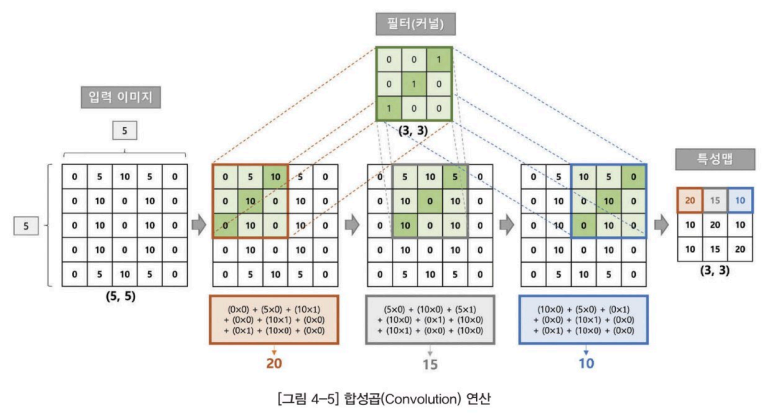

- 커널 크기가 3x3인 경우 총 9개의 가중치를 가지며 오차 역전파 시 커널의 가중치를 업데이트함.

- 합성곱 신경망이 이미지 특성 추출에 효율적인 이유는 공유 가중치 떄문

- 오파 역전파 시 커널의 그래디언트를 계산할 때 9개에 대해서만 업데이트하면 되므로 완전 연결층을 사용할 때보다 연산량이 훨씬 적음.

### [1-3] 채널(channel)

- 채널: 입력 이미지를 구성하는 2차원 배열 개수

- 흑백 이미지는 단일 채널 (채널 1개), 컬러 이미지는 3개 채널(R,G,B)를 가지는 이미지

  ex. 가로, 세로 5픽셀인 컬러 이미지의 shape: (5,5,3)



- 컬러 이미지의 특성맵 생성 과정

1. 입력 이미지의 채널 개수만큼 커널 생성

2. 각 채널마다 하나씩 커널을 적용하여 합성곱 연산 수행

3. 입력 이미지의 채널 개수만큼 생성된 합성곱 연산 결과에 element-wise 으로 더해주면 최종 특성맵 생성

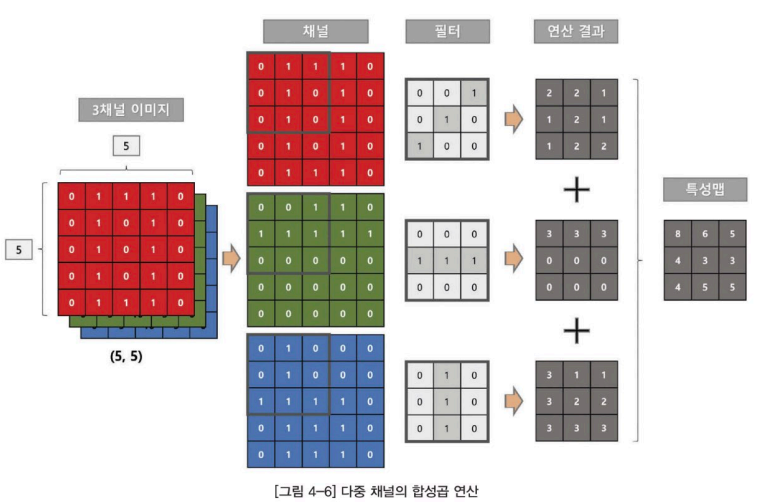

ex. 합성곱 레이어에 출력 필터의 개수를 20개로 설정 시, 입력 이미지의 채널 개수 3개와 출력 필터의 개수 20개가 곱해져 총 60개의 커널이 생성됨. 

커널 1개의 크기가 3x3으로 설정한다면, 해당 층에서 업데이트될 파라미터 개수는  3 * 3 * 3(입력 채널 수)*20(출력 필터 수) + 20(bias) = 560 개

### [1-4] 스트라이드(stride)

- stride: 커널이 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 수행할 때 이동하는 간격 (주로 1,2로 설정)

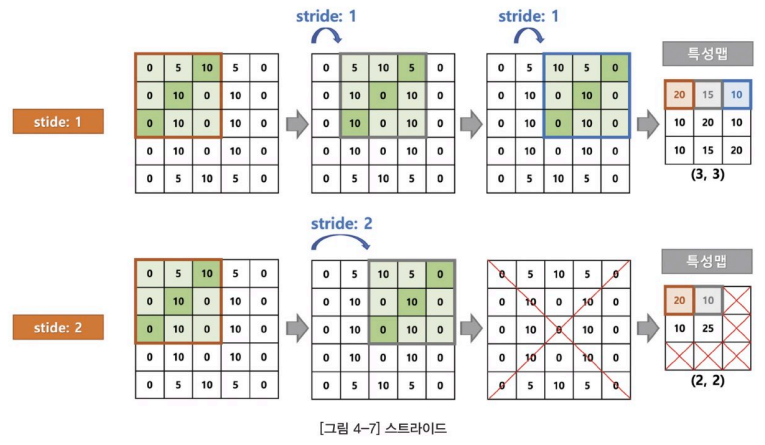

- stride를 1로 설정 시 커널은 우측으로 1픽셀씩 이동

- stride를 2로 설정시 2픽셀 씩 건너뛰기 때문에 특성맵의 크기가 1/2로 줄어듬.

### [1-5] 패딩(padding)

- 스트라이드로 인해 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩을 설정할 수 있음.

- zero-padding: 입력 이미지의 가장 자리에 0으로 채워진 패딩 값으로 채운 후 추출

- Covn2D 레이어에서 padding='same'으로 설정 시, zero-padding이 적용됨. (default: padding='valid')

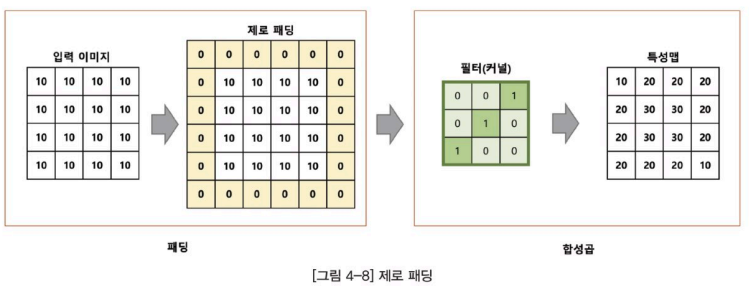

### [1-6] 특성맵(feature map) 사이즈

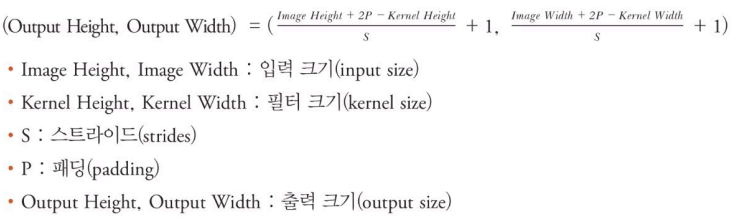

### [1-7] 풀링(pooling)

- 풀링 레이어: 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어 

- 이미지 축소를 통해 연산량 감소, 과대적합 방지

- 최대 풀링(max pooling), 평균 풀링(average pooling)으로 나뉨.

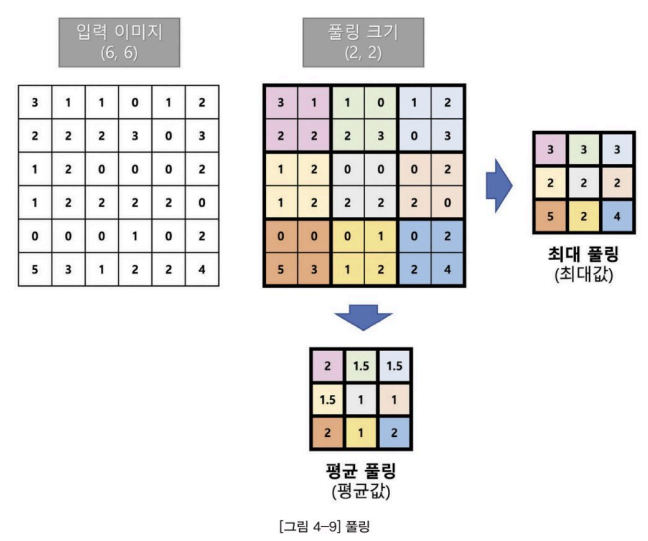

## 02 간단한 모델 생성

### [2-1] 데이터 로드 및 전처리

In [ ]:
import tensorflow as tf

# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


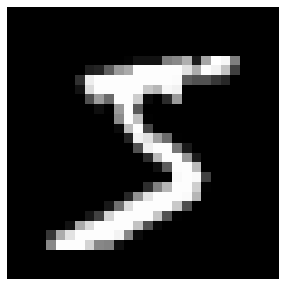

In [ ]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt
def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [ ]:
# 이미지 픽셀을 나타내는 값의 최소값, 최대값 출력
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [ ]:
# 정규화 (Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [ ]:
# 색상을 나타내는 채널 추가 (1개)
# (60000, 28, 28) -> (60000, 28, 28, 1)
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis] # 채널을 추가하고 싶은 위치에 tf.newaxis 작성
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


- 가장 앞에 차원을 추가: [tf.newaxis,...]

- 두 번째 차원을 추가: [:,tf.newaxis,:,:]

### [2-2] Sequential API로 모델 생성 및 학습

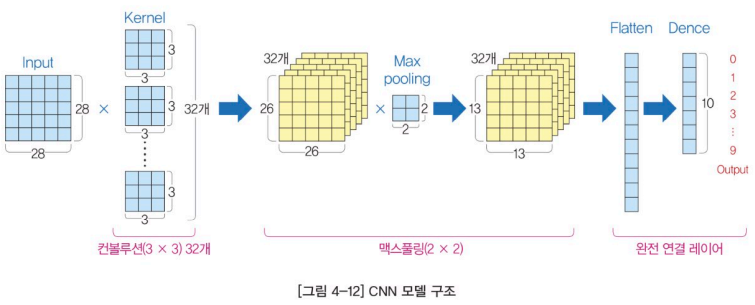

In [ ]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

Tip) 레이어 이름을 나타내는 name 속성은 따로 지정하지 않으면 자동 생성됨. 레이어 이름을 사용하여 레이어를 직접 제어하고 싶을 때 이름을 지정해주면 편리함.

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2112 - accuracy: 0.9410 - val_loss: 0.0843 - val_accuracy: 0.9758
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0767 - accuracy: 0.9780 - val_loss: 0.0603 - val_accuracy: 0.9811
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0579 - accuracy: 0.9833 - val_loss: 0.0640 - val_accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0480 - accuracy: 0.9856 - val_loss: 0.0537 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0404 - accuracy: 0.9875 - val_loss: 0.0528 - val_accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0353 - accuracy: 0.9891 - val_loss: 0.0549 - val_accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.0535 -

In [ ]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 3s 8ms/step - loss: 0.0602 - accuracy: 0.9821


[0.06024086847901344, 0.9821000099182129]

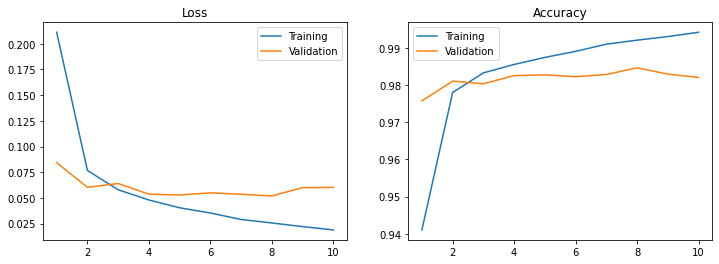

In [ ]:
# 4 epoch 이후부터는 모델이 과적합됨.

def plot_loss_acc(history, epoch):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1,2, figsize=(12,4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label="Validation")
  axes[0].legend(loc='best')
  axes[0].set_title("Loss")

  axes[1].plot(range(1, epoch+1), acc, label='Training')
  axes[1].plot(range(1, epoch+1), val_acc, label="Validation")
  axes[1].legend(loc='best')
  axes[1].set_title("Accuracy")

  plt.show()

plot_loss_acc(history, 10)

### [2-3] 모델 구조 파악

- summary(): 각 레이어의 이름, 출력 텐서의 형태, 각 레이어를 구성하는 파라미터(가중치) 개수를 알 수 있음.

In [ ]:
# 모델 구조
model.summary()

# 입력 텐서(28,28,1)가 Conv2D를 거치면서 (26,26,32) 형태로 변환됨.
# Flatten: 3차원 텐서를 펼침 (13*13*32 개 원소를 갖는 1차원 벡터)
# 출력 노드 10개 (0~9)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


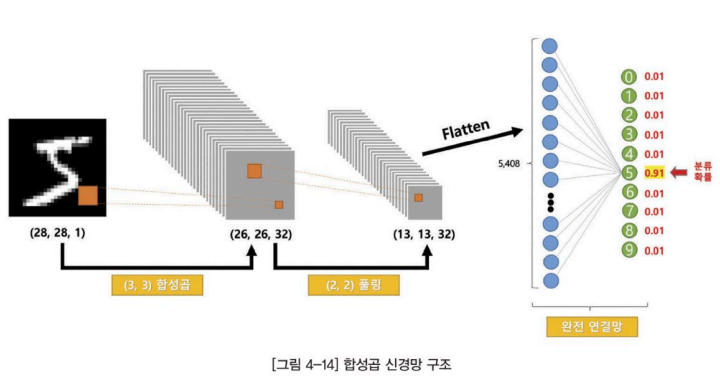

In [ ]:
# 입력 텐서 형태
model.input

# 가장 앞의 축(axis=0)의 None: 배치 크기가 들어오는 위치로서 배치 크기로 어떤 값이든 가능함.

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

Tip) 텐서를 구성하는 원소들의 자료형을 나타내는 dtype: float32 (32비트 실수형)

In [ ]:
# layers 속성 - 파이썬 리스트 형태로 레이어 객체를 담아서 보여줌.
model.layers

In [ ]:
# 첫 번째 레이어 선택
model.layers[0]

In [ ]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [ ]:
# 첫 번째 레이어 가중치
model.layers[0].weights

# conv/kernel:0 - 커널 행렬의 가중치
# conv/bias:0 - 각 커널의 상수항

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 1.22606590e-01,  1.14718713e-01,  1.78846419e-01,
            4.47783470e-01,  1.11690775e-01, -5.81163704e-01,
            2.49848351e-01, -6.95236683e-01, -1.35577530e-01,
           -6.36299700e-02, -3.04077893e-01,  4.38974112e-01,
           -4.95049804e-02,  3.27945977e-01, -7.46028244e-01,
           -1.15918279e+00,  3.61795694e-01,  3.39426875e-01,
            6.56631440e-02,  2.90943354e-01,  1.78340077e-02,
            2.04195112e-01, -1.14731327e-01,  2.82284468e-01,
           -3.53921242e-02, -7.07227707e-01, -6.66068852e-01,
           -1.22291028e-01,  3.05237114e-01, -7.44673789e-01,
            1.14224948e-01, -3.11099708e-01]],
 
         [[-5.51881373e-01, -4.33822542e-01,  3.41724098e-01,
            1.12320043e-01, -4.55188543e-01,  1.98225051e-01,
            1.51679307e-01, -2.57981867e-01, -3.90770197e-01,
            2.94349968e-01,  6.44384399e-02,  4.13787842e-01,
           

- 커널 가중치의 shape (3,3,1,32): (필터의 크기, 필터의 크기, 입력층의 채널 개수, 출력층의 채널 개수)

In [ ]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 1.22606590e-01,  1.14718713e-01,  1.78846419e-01,
           4.47783470e-01,  1.11690775e-01, -5.81163704e-01,
           2.49848351e-01, -6.95236683e-01, -1.35577530e-01,
          -6.36299700e-02, -3.04077893e-01,  4.38974112e-01,
          -4.95049804e-02,  3.27945977e-01, -7.46028244e-01,
          -1.15918279e+00,  3.61795694e-01,  3.39426875e-01,
           6.56631440e-02,  2.90943354e-01,  1.78340077e-02,
           2.04195112e-01, -1.14731327e-01,  2.82284468e-01,
          -3.53921242e-02, -7.07227707e-01, -6.66068852e-01,
          -1.22291028e-01,  3.05237114e-01, -7.44673789e-01,
           1.14224948e-01, -3.11099708e-01]],

        [[-5.51881373e-01, -4.33822542e-01,  3.41724098e-01,
           1.12320043e-01, -4.55188543e-01,  1.98225051e-01,
           1.51679307e-01, -2.57981867e-01, -3.90770197e-01,
           2.94349968e-01,  6.44384399e-02,  4.13787842e-01,
          -7.23512322e-02,  

In [ ]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.02878846, -0.26383108, -0.25617766, -0.09846409, -0.0656736 ,
        0.01675349, -0.36731052, -0.18405116, -0.17395084, -0.14202419,
       -0.05956307,  0.0821301 , -0.18319595, -0.2783478 , -0.04007748,
        0.09453695, -0.23785032, -0.38839954, -0.12259884, -0.01559615,
        0.00580192, -0.01502139, -0.11998989, -0.04982037, -0.17776243,
       -0.18422192, -0.19135392,  0.08571415, -0.30023932, -0.08700844,
       -0.28117025, -0.19716378], dtype=float32)>

In [ ]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [ ]:
# 모델에 입력 데이터를 넣어주고 모델의 첫 번째와 두 번째 레이어의 출력을 최종 출력으로 갖는 actiavtor 모델 정의
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis,...])
len(activations)

1/1 [==============================] - 0s 73ms/step


2

In [ ]:
# 첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape # 1: 입력 이미지 개수

(1, 26, 26, 32)

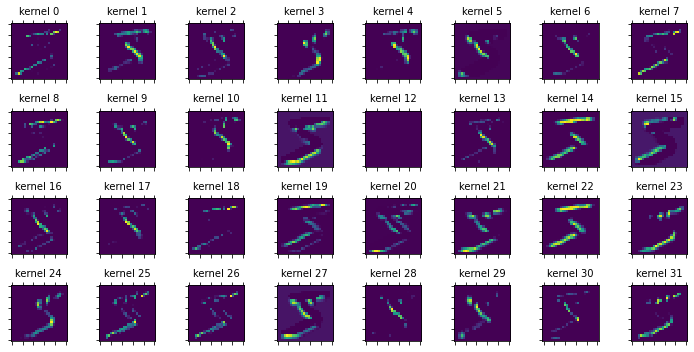

In [ ]:
# 첫 번째 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분하여 시각화
# 각 커널은 입력 이미지로부터 서로 다른 피처(특징)을 추출하는 역할
# Convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :,:,i], cmap='viridis')
  axes[i//8, i%8].set_title("kernel %s"%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
# 두 번째 레이어 출력층 - Pooling Layer
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


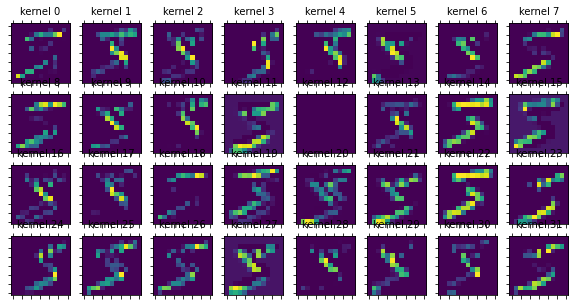

In [ ]:
# Conv2D 출력 이미지에 비해 화소 크기가 굵어짐. 픽셀 수는 줄이며 특성을 더 강하게 드러냄.
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :,:,i], cmap='viridis')
  axes[i//8, i%8].set_title("kernel %s"%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

## 03 복잡한 모델 생성

- Functional API를 사용하여 복잡한 구조의 모델 정의

### [3-1] 데이터셋 준비

In [2]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# 새로운 출력 값 배열 생성(홀수:1, 짝수:0)
y_train_odd = []

for y in y_train:
  if y%2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [4]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [5]:
# Validation 데이터셋 처리
y_valid_odd = []

for y in y_valid:
  if y%2 == 0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [6]:
# 정규화 (Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
# expand_dims(원본 배열, 새롭게 추가하려는 축의 인덱스)
x_train_in = tf.expand_dims(x_train, -1)  # 새로운 축은 끝에 추가됨.
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### [3-2] Functional API로 다중 입력, 다중 출력 레이어 생성

In [7]:
inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_input = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_input]) # 2개의 출력이 합쳐짐
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                              

Tip) model과 layer에 name 속성을 따로 지정해 주지 않으면, 앞의 실행 결과와 같이 model_1, input_2와 같이 정수형 인덱스를 사용하여 name 속성으로 자동 지정함.

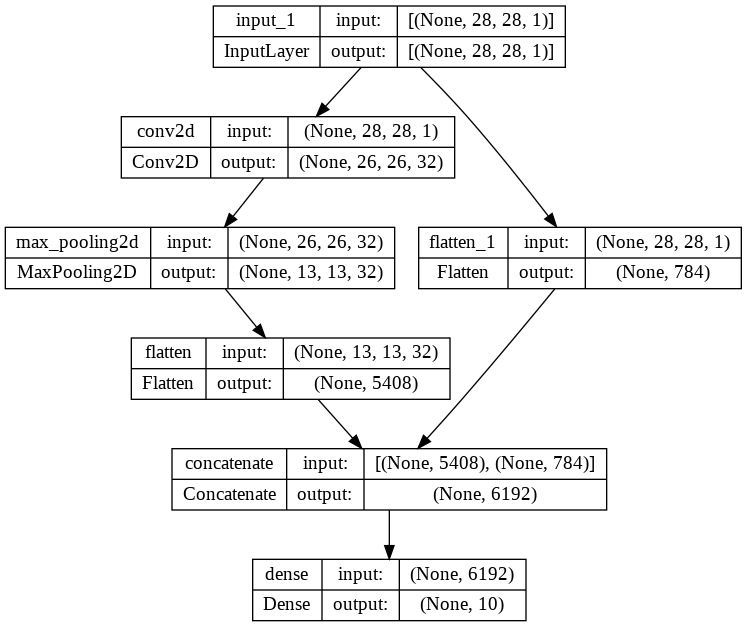

In [8]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [9]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)
# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2051 - accuracy: 0.9426 - val_loss: 0.0885 - val_accuracy: 0.9732
Epoch 2/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0803 - accuracy: 0.9767 - val_loss: 0.0679 - val_accuracy: 0.9793
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0622 - accuracy: 0.9811 - val_loss: 0.0658 - val_accuracy: 0.9796
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0510 - accuracy: 0.9845 - val_loss: 0.0552 - val_accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0569 - val_accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0628 - val_accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0587 -

Tip) 입력 이미지와 분류하는 문제가 비교적 단순하기 때문에 차이가 크게 느껴지지 않지만, 입력 이미지와 해결해야 하는 문제가 복잡한 경우에는 모델의 구조를 다양하게 만들어서 더 좋은 성능을 보여주는 모델을 찾는 과정이 필요함.

### [3-3] 다중 출력 분류 모델

- 0~9까지 숫자를 맞추는 분류 문제와 홀수, 짝수를 맞추는 분류 문제를 동시에 풀어내는 모델 정의

- 각기 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개로 만드는 것이 핵심



In [10]:
inputs = tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outpus = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outpus, odd_outputs])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [11]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


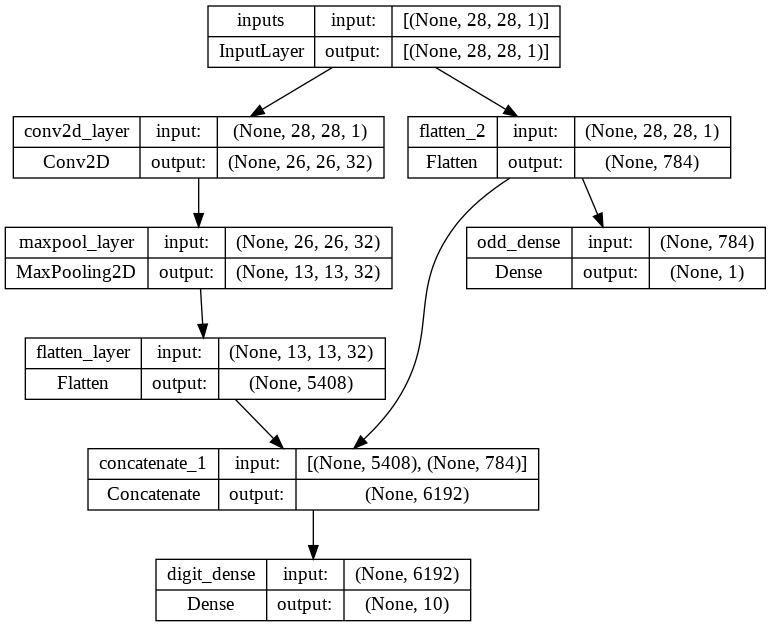

In [12]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [13]:
# 모델 컴파일 - 지정한 이름 별 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy', 
                                      'odd_dense':"binary_crossentropy"},
              loss_weights={'digit_dense':1, 'odd_dense':0.5}, metrics=['accuracy'])
              # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy)
# 모델 훈련
history = model.fit({'inputs':x_train_in},{'digit_dense':y_train, 'odd_dense':y_train_odd},
                    validation_data = ({'inputs':x_valid_in}, {'digit_dense':y_valid,'odd_dense':y_valid_odd}),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.3650 - digit_dense_loss: 0.2043 - odd_dense_loss: 0.3214 - digit_dense_accuracy: 0.9422 - odd_dense_accuracy: 0.8687 - val_loss: 0.2262 - val_digit_dense_loss: 0.0880 - val_odd_dense_loss: 0.2764 - val_digit_dense_accuracy: 0.9734 - val_odd_dense_accuracy: 0.8895
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2167 - digit_dense_loss: 0.0810 - odd_dense_loss: 0.2715 - digit_dense_accuracy: 0.9766 - odd_dense_accuracy: 0.8914 - val_loss: 0.1962 - val_digit_dense_loss: 0.0649 - val_odd_dense_loss: 0.2626 - val_digit_dense_accuracy: 0.9794 - val_odd_dense_accuracy: 0.8968
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1930 - digit_dense_loss: 0.0616 - odd_dense_loss: 0.2626 - digit_dense_accuracy: 0.9811 - odd_dense_accuracy: 0.8961 - val_loss: 0.1905 - val_digit_dense_loss: 0.0609 - val_odd_dense_loss: 0.2593 - val_digit_dense_accuracy: 0.9804 -

In [14]:
# 모델 성능
model.evaluate({'inputs':x_valid_in},{'digit_dense':y_valid, 'odd_dense':y_valid_odd})

# 숫자를 맞추는 문제는 98%의 정확도, 홀수 여부를 판단하는 90%의 정확도를 보임.

313/313 [==============================] - 3s 8ms/step - loss: 0.1888 - digit_dense_loss: 0.0607 - odd_dense_loss: 0.2562 - digit_dense_accuracy: 0.9842 - odd_dense_accuracy: 0.9022


[0.18881382048130035,
 0.060735370963811874,
 0.2561568021774292,
 0.9842000007629395,
 0.9021999835968018]

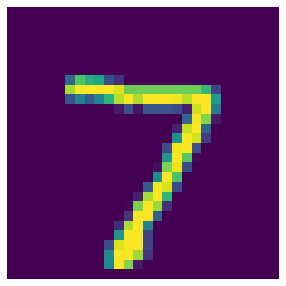

In [15]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [16]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0]) # 10개의 분류 레이블에 대한 확률
print(odd_preds[0]) # 홀수일 확률

313/313 [==============================] - 3s 8ms/step
[2.8234430e-13 1.0681329e-11 6.8894501e-10 7.1282592e-08 1.1657859e-13
 1.1447802e-13 1.3378119e-21 9.9999982e-01 9.2309616e-10 1.2974506e-10]
[0.999578]


In [17]:
# 10개 이미지에 대한 예측 레이블
digit_labels = np.argmax(digit_preds, axis=1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [18]:
# 홀수, 짝수 예측
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1,-1)[0]
odd_labels[0:10]

<ipython-input-18-f82669df9e3a>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1,-1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

### [3-4] 전이 학습 (Transfer Learning)

- Transfer Learning: 기존에 학습된 모델에 최종 출력층만 새롭게 추가하여 새로운 모델을 만들어 내는 것

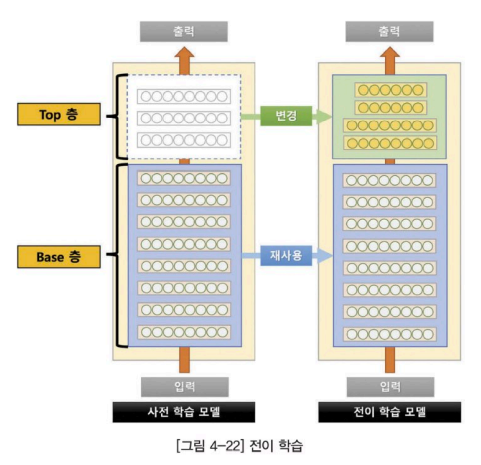

In [19]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


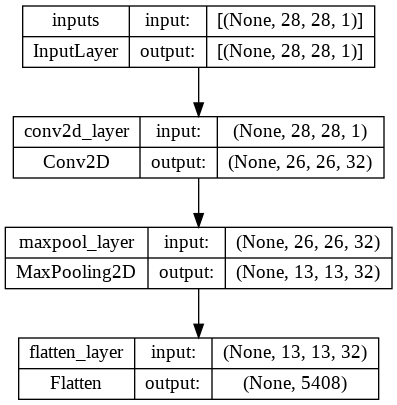

In [20]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [21]:
# Sequential API 적용 - 앞에서 정의한 base_model을 레이어로 추가하고 최종 분류기 역할을 하는 Dense 레이어를 새롭게 이어서 추가해줌.
digit_model = tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


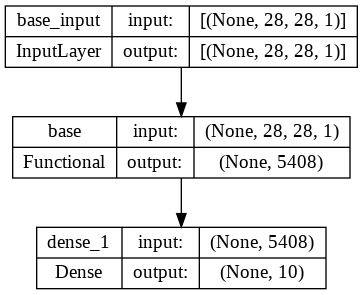

In [22]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

- trainable=True: 모델 훈련 시 파라미터 값이 업데이트됨. 

- trainable=False: 모델의 파라미터 값이 고정되어 훈련을 통해서 업데이트되지 않음.

In [23]:
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1296 - accuracy: 0.9636 - val_loss: 0.0713 - val_accuracy: 0.9781
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0583 - accuracy: 0.9823 - val_loss: 0.0533 - val_accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0484 - val_accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0507 - val_accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0.0514 - val_accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.0505 - val_accuracy: 0.9846
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0620 -

In [24]:
# 베이스 모델의 가중치 고정 (Freeze Model)
base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable=False
base_model_frozen.summary()
# Trainable params = 0

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [25]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [26]:
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1170 - accuracy: 0.9686 - val_loss: 0.0626 - val_accuracy: 0.9808
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0500 - accuracy: 0.9851 - val_loss: 0.0512 - val_accuracy: 0.9826
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0359 - accuracy: 0.9891 - val_loss: 0.0466 - val_accuracy: 0.9856
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0546 - val_accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0230 - accuracy: 0.9930 - val_loss: 0.0542 - val_accuracy: 0.9826
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0184 - accuracy: 0.9948 - val_loss: 0.0589 - val_accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0156 - accuracy: 0.9953 - val_loss: 0.0538 - val_

- 모델 전체가 아니라 특정 레이어를 지정하여 파라미터가 업데이트되지 않도록 고정하는 방법도 가능함.

In [28]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer) 
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False # Conv2D 레이어를 취소하고 trainable 속성을 False로 지정
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [29]:
# 앞의 고정한 모델에 새로운 분류기 역할을 하는 Dense 레이어를 연결하여 모델 구성
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [30]:
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1159 - accuracy: 0.9682 - val_loss: 0.0630 - val_accuracy: 0.9826
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0495 - accuracy: 0.9853 - val_loss: 0.0527 - val_accuracy: 0.9828
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0377 - accuracy: 0.9887 - val_loss: 0.0538 - val_accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0561 - val_accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0232 - accuracy: 0.9928 - val_loss: 0.0534 - val_accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0187 - accuracy: 0.9944 - val_loss: 0.0525 - val_accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 0.0536 - val_